# Read the Data

In [1]:
import os
import json
from pprint import pprint

# READ THE DATA
DATA_DIR = os.path.join('..', 'project_1', 'data','boxofficemojo') 
movies = []
for movie_file_name in os.listdir(DATA_DIR):
    movie_path = os.path.join(DATA_DIR, movie_file_name)
    with open(movie_path, 'r') as infile:
        movies.append(json.load(infile))

#import project_1.loaddata
#movies = project_1.loaddata.get_boxofficemojo_data()

print len(movies)
pprint(movies[:3])

3728
[{u'alt_title': u'10,000 B.C. (2008)',
  u'director': u'Roland Emmerich',
  u'domestic_gross': 94784201,
  u'mojo_slug': u'10000bc',
  u'opening_per_theater': 10518,
  u'opening_weekend_take': 35867488,
  u'production_budget': 105000000,
  u'release_date_limited': None,
  u'release_date_wide': u'2008-03-07',
  u'title': u'10,000 B.C.',
  u'widest_release': 3454,
  u'worldwide_gross': 269784201,
  u'year': 2008},
 {u'alt_title': u'102 Dalmatians (2000)',
  u'director': None,
  u'domestic_gross': 66957026,
  u'mojo_slug': u'102dalmatians',
  u'opening_per_theater': 7353,
  u'opening_weekend_take': 19883351,
  u'production_budget': 85000000,
  u'release_date_limited': None,
  u'release_date_wide': u'2000-11-22',
  u'title': u'102 Dalmatians ',
  u'widest_release': 2704,
  u'worldwide_gross': 183611771,
  u'year': 2000},
 {u'alt_title': u'10 Things I Hate About You (1999)',
  u'director': None,
  u'domestic_gross': 38178166,
  u'mojo_slug': u'10thingsihateaboutyou',
  u'opening_per_th

# Exploratory Data Analysis (EDA)

### What years are the movies from?

In [2]:
movie_years = [movie['year'] for movie in movies]
# This is a list comprehension: http://www.diveintopython.net/native_data_types/mapping_lists.html

from collections import Counter
# https://docs.python.org/2/library/collections.html#collections.Counter

year_counter = Counter()
for year in movie_years:
    year_counter[year] += 1
    
#print year_counter
print "We have", year_counter[2013], "movies from 2013."
print year_counter.most_common(5)

We have 308 movies from 2013.
[(2013, 308), (2014, 280), (2011, 264), (2012, 257), (2010, 209)]


Let's check out the whole distribution

In [3]:
pprint(dict(year_counter))

{None: 7,
 1933: 1,
 1936: 1,
 1937: 1,
 1940: 1,
 1946: 1,
 1950: 1,
 1951: 3,
 1953: 1,
 1956: 2,
 1959: 1,
 1960: 1,
 1964: 1,
 1967: 2,
 1968: 2,
 1969: 4,
 1970: 6,
 1971: 2,
 1972: 4,
 1974: 4,
 1975: 3,
 1976: 6,
 1977: 4,
 1978: 6,
 1979: 9,
 1980: 14,
 1981: 12,
 1982: 18,
 1983: 19,
 1984: 17,
 1985: 13,
 1986: 21,
 1987: 27,
 1988: 31,
 1989: 29,
 1990: 24,
 1991: 24,
 1992: 28,
 1993: 39,
 1994: 30,
 1995: 51,
 1996: 52,
 1997: 74,
 1998: 84,
 1999: 106,
 2000: 99,
 2001: 108,
 2002: 132,
 2003: 146,
 2004: 161,
 2005: 164,
 2006: 184,
 2007: 190,
 2008: 194,
 2009: 192,
 2010: 209,
 2011: 264,
 2012: 257,
 2013: 308,
 2014: 280,
 2015: 53}


Ok, looking at this is like looking at a histogram. (By the way we have 7 None values.) We get a general sense, 

### but let's make a real histogram
http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

TypeError: unsupported operand type(s) for +: 'NoneType' and 'float'

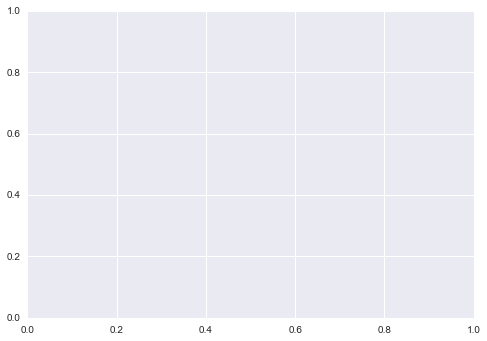

In [5]:
plt.hist(movie_years)

Whoa! What just happened? We have a weird error. Hmm. It says NoneType in the error. Remember those None values, perhaps they are causing this. Let's remove them and try again.

In [ ]:
movie_years_clean = [year for year in movie_years if year]

print len(movie_years), len(movie_years_clean)

In [ ]:
year_histogram = plt.hist(movie_years_clean)
title = plt.title("Number of movies per year in our dataset")

Let's look at something else, what do we have?

In [ ]:
movies[0].keys()

In [ ]:
domestic_gross_numbers = [movie['domestic_gross'] for movie in movies if movie['domestic_gross']]
print domestic_gross_numbers[:5]

In [ ]:
gross_histogram = plt.hist(domestic_gross_numbers)
title = plt.title("Domestic gross distribution of movies in the dataset")

Can't really see. Super low gross movies dominate. We can see better if we use log scale and look at log(gross) instead

In [ ]:
gross_histogram = plt.hist(domestic_gross_numbers, log=True)
title = plt.title("Log(Domestic gross) distribution of movies in the dataset")

How about the length of their names?

In [ ]:
title_lengths = [len(movie['title']) for movie in movies]
plt.hist(title_lengths)
plt.xlabel("Movie title length")
plt.ylabel("Number of movies")

Now let's do this with pandas

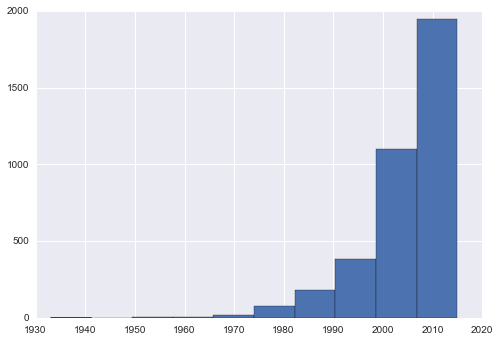

In [13]:
import pandas as pd

movies_df = pd.DataFrame(movies)
movies_df['year'].hist()

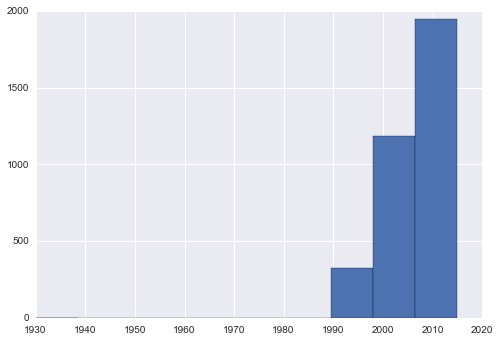

In [14]:
recent_movies = movies_df[movies_df['year']>=1990]
recent_movies['year'].hist(range=(1930, 2015))

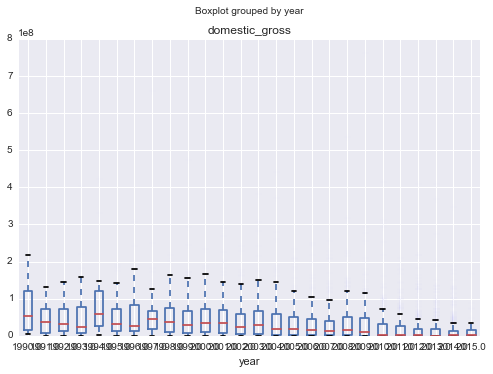

In [15]:
#boxplot = recent_movies.boxplot(column='year')
#boxplot = recent_movies.boxplot(column='domestic_gross')
boxplot = recent_movies.boxplot(column='domestic_gross', by='year')

Ok, this is good but the default size is too small

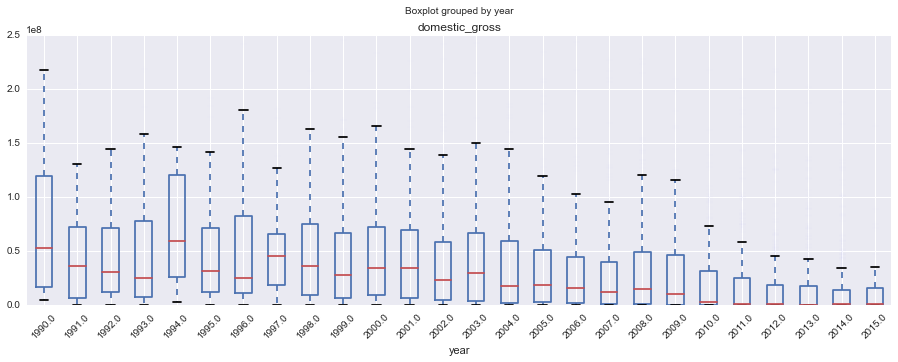

In [16]:
boxplot = recent_movies.boxplot(column='domestic_gross', by='year', figsize=(15,5), rot=45)
y_range = plt.ylim(0,2.5e8)

In [17]:
movies_df.head()

,alt_title,director,domestic_gross,mojo_slug,opening_per_theater,opening_weekend_take,production_budget,release_date_limited,release_date_wide,title,widest_release,worldwide_gross,year
0,"10,000 B.C. (2008)",Roland Emmerich,94784201,10000bc,10518,35867488,105000000,None,2008-03-07,"10,000 B.C.",3454,269784201,2008
1,102 Dalmatians (2000),None,66957026,102dalmatians,7353,19883351,85000000,None,2000-11-22,102 Dalmatians,2704,183611771,2000
2,10 Things I Hate About You (1999),None,38178166,10thingsihateaboutyou,3668,8330681,30000000,None,1999-03-31,10 Things I Hate About You,2311,53478166,1999
3,10 Years (2012),Jamie Linden,203373,10years,7569,22707,NaN,None,2012-09-14,10 Years,63,203373,2012
4,11 Flowers (2013),None,9213,11flowers,1758,3516,NaN,None,2013-02-22,11 Flowers,2,NaN,2013


In [18]:
movies_df.describe()

,domestic_gross,opening_per_theater,opening_weekend_take,production_budget,widest_release,worldwide_gross,year
count,3.653000e+03,3548.000000,3.548000e+03,1.591000e+03,3576.000000,2.821000e+03,3721.000000
mean,3.587710e+07,7769.070744,8.919290e+06,4.594223e+07,1359.910794,9.117943e+07,2004.740124
std,5.660351e+07,8251.101404,1.403204e+07,4.056849e+07,1293.817347,1.489563e+08,9.127232
min,7.200000e+01,72.000000,7.200000e+01,2.200000e+02,1.000000,7.200000e+01,1933.000000
25%,6.353250e+05,3212.000000,4.748775e+04,1.675000e+07,52.000000,5.710236e+06,2001.000000
50%,1.323532e+07,5520.500000,3.334686e+06,3.500000e+07,1074.500000,3.554776e+07,2007.000000
75%,4.966253e+07,9463.500000,1.268750e+07,6.500000e+07,2584.250000,1.166729e+08,2011.000000
max,7.605076e+08,204230.000000,1.741446e+08,2.150000e+08,4468.000000,2.787965e+09,2015.000000


In [19]:
len(movies_df.production_budget.dropna())

1591

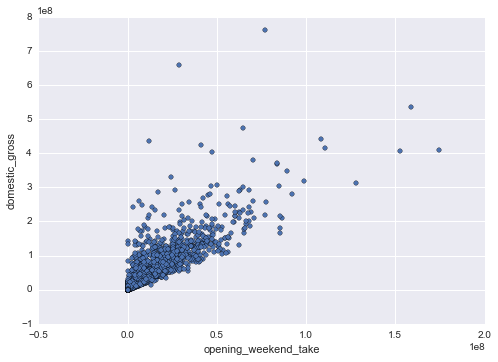

In [20]:
movies_df.plot(kind='scatter', x='opening_weekend_take', y='domestic_gross')

In [21]:
movies_df[['domestic_gross', 'opening_weekend_take']].head()

,domestic_gross,opening_weekend_take
0,94784201,35867488
1,66957026,19883351
2,38178166,8330681
3,203373,22707
4,9213,3516


In [22]:
print 'shape for all data:', movies_df.shape
df = movies_df[['domestic_gross', 'opening_weekend_take']]
print 'shape for only our two columns:', df.shape
df = df.dropna()
print 'shape after dropping rows with missing data:', df.shape

shape for all data: (3728, 13)
shape for only our two columns: (3728, 2)
shape after dropping rows with missing data: (3548, 2)


### Let's do a linear regression

In [23]:
import statsmodels.api as sm

Y = df.domestic_gross
X = sm.add_constant(df.opening_weekend_take)

linmodel = sm.OLS(Y,X).fit()

In [24]:
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     9522.
Date:                Tue, 15 Sep 2015   Prob (F-statistic):               0.00
Time:                        23:21:29   Log-Likelihood:                -66088.
No. Observations:                3548   AIC:                         1.322e+05
Df Residuals:                    3546   BIC:                         1.322e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                 5.397e+06   5.92e+05      9.120      0.000      4.24e+06  6.56e+06
opening_weekend_take     3.4734      0.036     97.581      0.000         3.404     3.543
==============================================================================
Omnibus:                     4177.673   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           873313.507
Skew:                           5.909   Prob(JB):                         0.00
Kurtosis:                      78.946   Cond. No.                     1.97e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

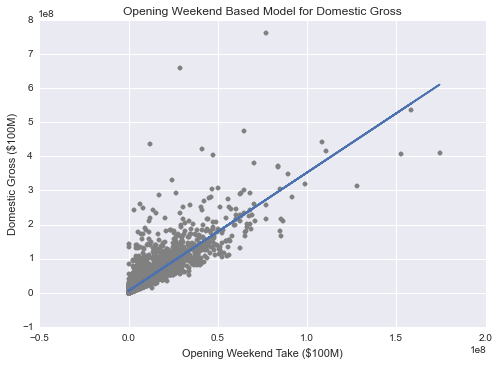

In [25]:
predicted_gross = linmodel.predict()
plt.scatter(df.opening_weekend_take, df.domestic_gross, color='gray')
plt.plot(df.opening_weekend_take, predicted_gross)
plt.title("Opening Weekend Based Model for Domestic Gross")
plt.xlabel("Opening Weekend Take ($100M)")
plt.ylabel("Domestic Gross ($100M)")

In [26]:
print linmodel.mse_resid

8.84860991945e+14


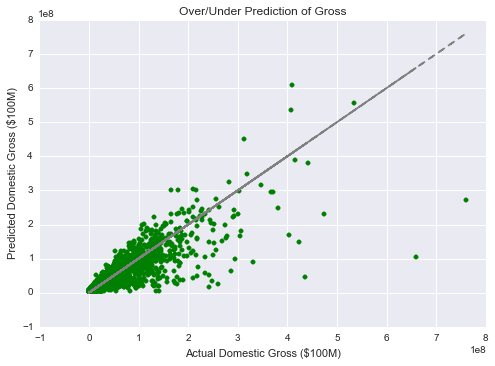

In [27]:
plt.scatter(df.domestic_gross, predicted_gross, color='green')
plt.plot(df.domestic_gross, df.domestic_gross, '--', color='gray')
plt.title("Over/Under Prediction of Gross")
plt.xlabel("Actual Domestic Gross ($100M)")
plt.ylabel("Predicted Domestic Gross ($100M)")

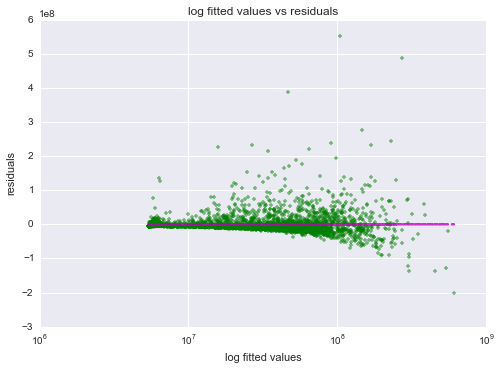

In [28]:
fig,ax = plt.subplots()
ax.set_xscale('log')
plt.plot(linmodel.fittedvalues,linmodel.resid,'g.',alpha=0.5)
plt.plot(linmodel.fittedvalues,Y*0,'m--',alpha=0.8)
plt.title('log fitted values vs residuals')
plt.xlabel('log fitted values')
plt.ylabel('residuals')

### does log transform help?

In [29]:
import numpy as np
df = movies_df[['domestic_gross','opening_weekend_take']]

df.loc[:,'log_domestic_gross'] = np.log(df.domestic_gross)
df.loc[:,'log_opening_weekend_take'] = np.log(df.opening_weekend_take)

/usr/local/lib/python2.7/site-packages/pandas/core/indexing.py:245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = np.nan
/usr/local/lib/python2.7/site-packages/pandas/core/indexing.py:490: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [30]:
df.head()

,domestic_gross,opening_weekend_take,log_domestic_gross,log_opening_weekend_take
0,94784201,35867488,18.367113,17.395342
1,66957026,19883351,18.019562,16.805393
2,38178166,8330681,17.457774,15.935456
3,203373,22707,12.222797,10.030429
4,9213,3516,9.128371,8.165079


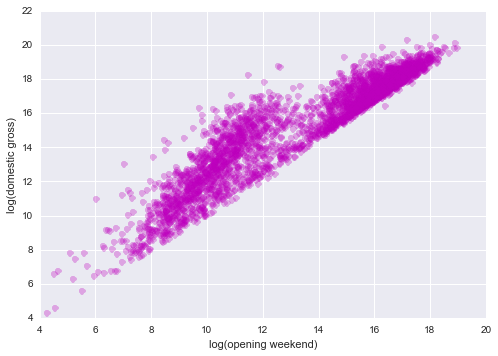

In [31]:
plt.plot(df.log_opening_weekend_take,df.log_domestic_gross,'mo',alpha=0.3)
plt.xlabel('log(opening weekend)')
plt.ylabel('log(domestic gross)')

In [32]:
df=df.dropna()
Y = df.log_domestic_gross
X = sm.add_constant(df.log_opening_weekend_take)

linmodel_logs = sm.OLS(Y,X).fit()
linmodel_logs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     log_domestic_gross   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                 2.707e+04
Date:                Tue, 15 Sep 2015   Prob (F-statistic):               0.00
Time:                        23:21:38   Log-Likelihood:                -4966.8
No. Observations:                3548   AIC:                             9938.
Df Residuals:                    3546   BIC:                             9950.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
const                        3.5212      0.074     47.359      0.000         3.375     3.667
log_opening_weekend_take     0.8707      0.005    164.516      0.000         0.860     0.881
==============================================================================
Omnibus:                      345.463   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              588.540
Skew:                           0.686   Prob(JB):                    1.59e-128
Kurtosis:                       4.449   Cond. No.                         63.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

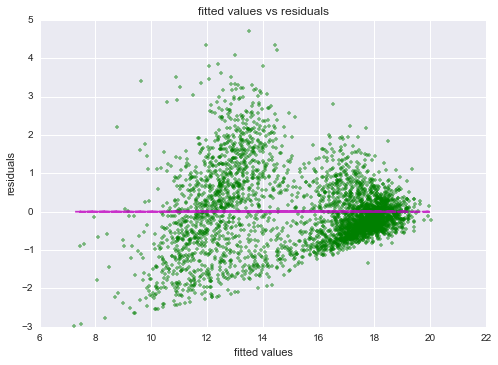

In [33]:
def residual_plot(model):
    fig,ax = plt.subplots()
    plt.plot(model.fittedvalues,model.resid,'g.',alpha=0.5)
    plt.plot(model.fittedvalues,Y*0,'m--',alpha=0.8)
    plt.title('fitted values vs residuals')
    plt.xlabel('fitted values')
    plt.ylabel('residuals')
    
residual_plot(linmodel_logs)

In [34]:
movies_df['opening_week2'] = movies_df.opening_weekend_take**2
movies_df['log_domestic_gross'] = np.log(movies_df.domestic_gross)
movies_df['log_opening_weekend'] = np.log(movies_df.opening_weekend_take)
movies_df['log_opening_weekend2'] = movies_df.log_opening_weekend**2

columns = ['domestic_gross','log_domestic_gross','opening_weekend_take','opening_week2','log_opening_weekend','log_opening_weekend2']
polydf = movies_df[columns].dropna()
polydf.head()

,domestic_gross,log_domestic_gross,opening_weekend_take,opening_week2,log_opening_weekend,log_opening_weekend2
0,94784201,18.367113,35867488,1.286477e+15,17.395342,302.597917
1,66957026,18.019562,19883351,3.953476e+14,16.805393,282.421244
2,38178166,17.457774,8330681,6.940025e+13,15.935456,253.938750
3,203373,12.222797,22707,5.156078e+08,10.030429,100.609496
4,9213,9.128371,3516,1.236226e+07,8.165079,66.668519


In [35]:
import statsmodels.formula.api as smf

formula = 'log_domestic_gross ~ log_opening_weekend + log_opening_weekend2'
quadmodel = smf.ols(formula,data=polydf).fit()
quadmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     log_domestic_gross   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                 1.463e+04
Date:                Tue, 15 Sep 2015   Prob (F-statistic):               0.00
Time:                        23:21:40   Log-Likelihood:                -4843.4
No. Observations:                3548   AIC:                             9693.
Df Residuals:                    3545   BIC:                             9711.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept               -1.6211      0.330     -4.916      0.000        -2.268    -0.975
log_opening_weekend      1.7175      0.053     32.253      0.000         1.613     1.822
log_opening_weekend2    -0.0327      0.002    -15.977      0.000        -0.037    -0.029
==============================================================================
Omnibus:                      262.595   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              413.434
Skew:                           0.577   Prob(JB):                     1.67e-90
Kurtosis:                       4.210   Cond. No.                     4.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

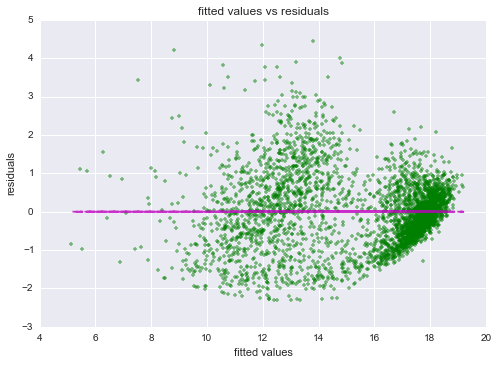

In [36]:
residual_plot(quadmodel)

As soon as we have a more solid understanding of how to evaluate/compare different models, this process is figuring out the right model form: Which features, in what functional shapes, interacting how?

Ok, so how do we do the same thing with scikit.learn?

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
Y = df['domestic_gross']
X = df[['opening_weekend_take']]
model.fit(X, Y)
print model.coef_
print model.intercept_

[ 3.47337085]
5397173.56914


In [44]:
from sklearn.metrics import mean_squared_error
Y_pred = model.predict(X)
Y_true = Y
print mean_squared_error(Y_pred, Y_true)

8.84362197699e+14
